In [1]:
import pandas as pd

In [2]:
all_matches = pd.read_json("results/all_matches_of_Test5.docx.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')


In [3]:
all_matches.to_json("results/all_matches_best_of_Test5.docx.json", orient="records", force_ascii=False, indent=4)

### Let's compare


In [4]:
semantique= pd.read_json("results/all_matches_best_of_Test5.docx.json", orient="records")

In [5]:
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

,title,question_semantique,sentence_semantique
0,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
1,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
2,Autonomie de décision,La fonction applique des consignes et des dire...,en appliquant des consignes
3,Nature,La fonction requiert de l'expérience professio...,Formation et expériences professionnelles requ...
4,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...
5,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,Veiller de sa propre initiative à l'adéquation...
6,Innovation,L'exercice de la fonction requiert la capacité...,Veiller de sa propre initiative à l'adéquation...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
8,Nature des communications externes,Les communications impliquent des négociations...,gérer d'une manière professionnelle des situat...
9,Nature des communications internes,Les communications impliquent des échanges d'i...,gérer d'une manière professionnelle des situat...


In [6]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Test5.docx.json", orient="records")


In [7]:
lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

,title,question_lexicale,sentence_lexicale
0,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
1,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
2,Autonomie de décision,La fonction applique des consignes et des dire...,des protocoles et des directives établies
3,Responsabilités budgétaires,La fonction participe à l'élaboration et assur...,Être garant du respect de son horaire de trava...
4,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",(selon critères d'evaluation des fonctions des...
5,Innovation,L'exercice de la fonction s'effectue dans le c...,ve à l'évolution de l'accompagnement afin de g...
6,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...
7,Impact interne des prestations,L'activité de la fonction a un impact détermin...,Effectuer son activité dans les valeurs de la ...
8,Impact externe des prestations,La fonction a un rôle primordial dans le choix...,Effectuer son activité dans les valeurs de la ...
9,Nature,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...


In [8]:
llm= pd.read_json("results/after_llm_of_Test5.docx.json", orient="records")


In [9]:
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

,title,question_llm,sentence_llm
0,Analyse et synthèse,La fonction requiert la faculté d'analyser des...,Veiller de sa propre initiative à l'adéquation...
1,Autonomie de décision,La fonction agit de manière autonome dans le c...,Veiller de sa propre initiative à l'adéquation...
2,Complexité de l'environnement,La fonction fait fréquemment face à un degré i...,Veiller de sa propre initiative à l'adéquation...
3,Connaissances linguistiques,La fonction requiert des connaissances linguis...,Veiller de sa propre initiative à l'adéquation...
4,Diversité des missions,L'ensemble des tâches principales qui incomben...,gérer d'une manière professionnelle des situat...
5,Diversité et quantité des postes à gérer,La fonction gère directement un grand nombre d...,Participer aux tâches d'administration
6,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Veiller de sa propre initiative à l'adéquation...
7,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,gérer d'une manière professionnelle des situat...
8,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
9,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...


In [10]:
corrected= pd.read_json("results/corrected_of_Test5.docx.json", orient="records")
corrected.drop(columns=[ 'score', 'pts'], inplace=True)
corrected.rename(columns={'question': 'question_corrected', 'sentence': 'sentence_corrected'}, inplace=True)
corrected

,title,question_corrected,sentence_corrected
0,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
2,Nature,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,Encadrer et accompagner le bénéficiaire de pre...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Assurer le suivi administratif requis de maniè...
6,Autonomie de décision,La fonction applique des consignes et des dire...,en appliquant des consignes
7,Diversité et quantité des postes à gérer,,
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Encadrer et accompagner le bénéficiaire de pre...
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,contribuer à l'accompagnement global du bénéfi...


In [11]:
# Merge all four DataFrames on 'title' sequentially
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


,title,question_corrected,sentence_corrected,question_llm,sentence_llm,question_semantique,sentence_semantique,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
2,Nature,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...,La fonction requiert de l'expérience professio...,Formation et expériences professionnelles requ...,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...,Une durée minimum de 1 à 3 ans d'expérience pr...,Veiller de sa propre initiative à l'adéquation...,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,Encadrer et accompagner le bénéficiaire de pre...,La fonction est responsable de l'élaboration e...,Être garant du respect de son horaire de trava...,La fonction participe de manière prépondérante...,Veiller de sa propre initiative à l'adéquation...,La fonction est responsable de l'élaboration e...,Être garant du respect de son horaire de trava...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Assurer le suivi administratif requis de maniè...,La fonction contribue de manière active à l'él...,contribuer à l'accompagnement global du bénéfi...,La fonction préavise des plans à long terme. E...,Veiller de sa propre initiative à l'adéquation...,La fonction contribue de manière active à l'él...,ve à l'évolution de l'accompagnement afin de g...
6,Autonomie de décision,La fonction applique des consignes et des dire...,en appliquant des consignes,La fonction agit de manière autonome dans le c...,Veiller de sa propre initiative à l'adéquation...,La fonction applique des consignes et des dire...,en appliquant des consignes,La fonction applique des consignes et des dire...,des protocoles et des directives établies
7,Diversité et quantité des postes à gérer,,,La fonction gère directement un grand nombre d...,Participer aux tâches d'administration,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Encadrer et accompagner le bénéficiaire de pre...,La fonction a un rôle primordial dans le choix...,"en lien avec ""la politique de bientraitance"" d...",La fonction a un rôle primordial dans le choix...,Effectuer son activité dans les valeurs de la ...,La fonction a un rôle primordial dans le choix...,Effectuer son activité dans les valeurs de la ...
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,contribuer à l'accompagnement global du bénéfi...,L'activité de la fonction a un impact d

### Réponses communes par toutes les méthodes

In [12]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    




Réponse commune pour la question : Formation de base
--> La fonction requiert une formation professionnelle initiale de 2 ans (AFP) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Aucune formation complémentaire n'est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Nature
--> La fonction requiert de l'expérience professionnelle préalable.
Réponse commune pour la question : Nature des communications internes
--> Les communications impliquent des échanges d'informations et des négociations sur des sujets complexes dans le cadre de prises de décisions. La fonction nécessite des capacités à négocier, comprendre et gérer différentes perceptions des prestations offertes.
Réponse commune pour la question : Complexité de l'environnement
--> La fonction fait fréquemment face à un degré important de difficultés, souvent nouvelles, et les situations générées requièrent adaptabilité, flexibilité et initiative.


In [13]:
nbreReponsesCommunes = len(mappingRepCommunes)
nbreReponsesCommunes

5

In [14]:
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

Taux de réponses communes : 25.00%


### Réponses correctes par la méthode sémantique

In [15]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [16]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert une formation professionnelle initiale de 2 ans (AFP) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Aucune formation complémentaire n'est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Nature
--> La fonction requiert de l'expérience professionnelle préalable.
Réponse commune pour la question : Durée
--> Une durée minimum de 0 à 1 an d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Autonomie de décision
--> La fonction applique des consignes et des directives établies.
Réponse commune pour la question : Nature des communications internes
--> Les communications impliquent des échanges d'informations et des négociations sur des sujets complexes dans le cadre de prises de décisions. La fonction nécessite des capacités à négocier, comprendre et gérer différentes perceptions des prestations off

In [17]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
nbreReponsesCorrectedSemantique

8

In [18]:
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

Taux de réponses correctes par la méthode sémantique : 40.00%


### Réponses correctes par la méthode llm

In [19]:
correctedAndLlm = corrected.merge(llm, on='title')

In [20]:
correctedAndLlm

,title,question_corrected,sentence_corrected,question_llm,sentence_llm
0,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
2,Nature,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...,Une durée minimum de 1 à 3 ans d'expérience pr...,Veiller de sa propre initiative à l'adéquation...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,Encadrer et accompagner le bénéficiaire de pre...,La fonction est responsable de l'élaboration e...,Être garant du respect de son horaire de trava...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Assurer le suivi administratif requis de maniè...,La fonction contribue de manière active à l'él...,contribuer à l'accompagnement global du bénéfi...
6,Autonomie de décision,La fonction applique des consignes et des dire...,en appliquant des consignes,La fonction agit de manière autonome dans le c...,Veiller de sa propre initiative à l'adéquation...
7,Diversité et quantité des postes à gérer,,,La fonction gère directement un grand nombre d...,Participer aux tâches d'administration
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Encadrer et accompagner le bénéficiaire de pre...,La fonction a un rôle primordial dans le choix...,"en lien avec ""la politique de bientraitance"" d..."
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,contribuer à l'accompagnement global du bénéfi...,L'activité de la fonction a un impact détermin...,Veiller de sa propre initiative à l'adéquation...


In [21]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert une formation professionnelle initiale de 2 ans (AFP) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Aucune formation complémentaire n'est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Nature
--> La fonction requiert de l'expérience professionnelle préalable.
Réponse commune pour la question : Responsabilités de planification et de réalisation des activités à court terme
--> La fonction est responsable de l'élaboration et de la mise en oeuvre de plans à court terme. Ceci implique, par exemple, la gestion, l'optimisation et la mise en oeuvre des différentes procédures à instaurer pour réaliser la planification à long terme.
Réponse commune pour la question : Responsabilités de planification et de réalisation des activités à long terme
--> La fonction contribue de manière active à l'élaboration et/ou au suivi de plans à long terme et/ou a un rôle d

In [22]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
nbreReponsesCorrectedLlm

10

In [23]:
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

Taux de réponses correctes par la méthode llm : 50.00%


### Réponses corretes par la méthode lexicale

In [24]:
correctedAndLexicale = corrected.merge(lexicale, on='title')

In [25]:
correctedAndLexicale

,title,question_corrected,sentence_corrected,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...,La fonction requiert une formation professionn...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...,Aucune formation complémentaire n'est nécessai...
2,Nature,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...,La fonction requiert de l'expérience professio...,La durée de l'expérience professionnelle est d...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l'expérience professionnelle est d...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,Encadrer et accompagner le bénéficiaire de pre...,La fonction est responsable de l'élaboration e...,Être garant du respect de son horaire de trava...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Assurer le suivi administratif requis de maniè...,La fonction contribue de manière active à l'él...,ve à l'évolution de l'accompagnement afin de g...
6,Autonomie de décision,La fonction applique des consignes et des dire...,en appliquant des consignes,La fonction applique des consignes et des dire...,des protocoles et des directives établies
7,Diversité et quantité des postes à gérer,,,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Encadrer et accompagner le bénéficiaire de pre...,La fonction a un rôle primordial dans le choix...,Effectuer son activité dans les valeurs de la ...
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,contribuer à l'accompagnement global du bénéfi...,L'activité de la fonction a un impact détermin...,Effectuer son activité dans les valeurs de la ...


In [26]:
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert une formation professionnelle initiale de 2 ans (AFP) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Aucune formation complémentaire n'est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Nature
--> La fonction requiert de l'expérience professionnelle préalable.
Réponse commune pour la question : Durée
--> Une durée minimum de 0 à 1 an d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Responsabilités de planification et de réalisation des activités à court terme
--> La fonction est responsable de l'élaboration et de la mise en oeuvre de plans à court terme. Ceci implique, par exemple, la gestion, l'optimisation et la mise en oeuvre des différentes procédures à instaurer pour réaliser la planification à long terme.
Réponse commune pour la question : Responsabilités de planification et de réali

In [27]:
nbreReponsesCorrectedLexicale = len(mappingRepCorrectesLexicale)
nbreReponsesCorrectedLexicale

11

In [28]:
tauxReponseCorrectedLexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedLexicale:.2f}%")

Taux de réponses correctes par la méthode lexicale : 55.00%


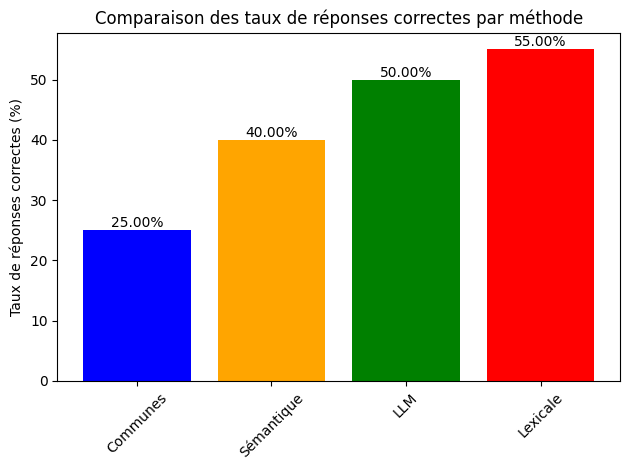

In [29]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedLexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

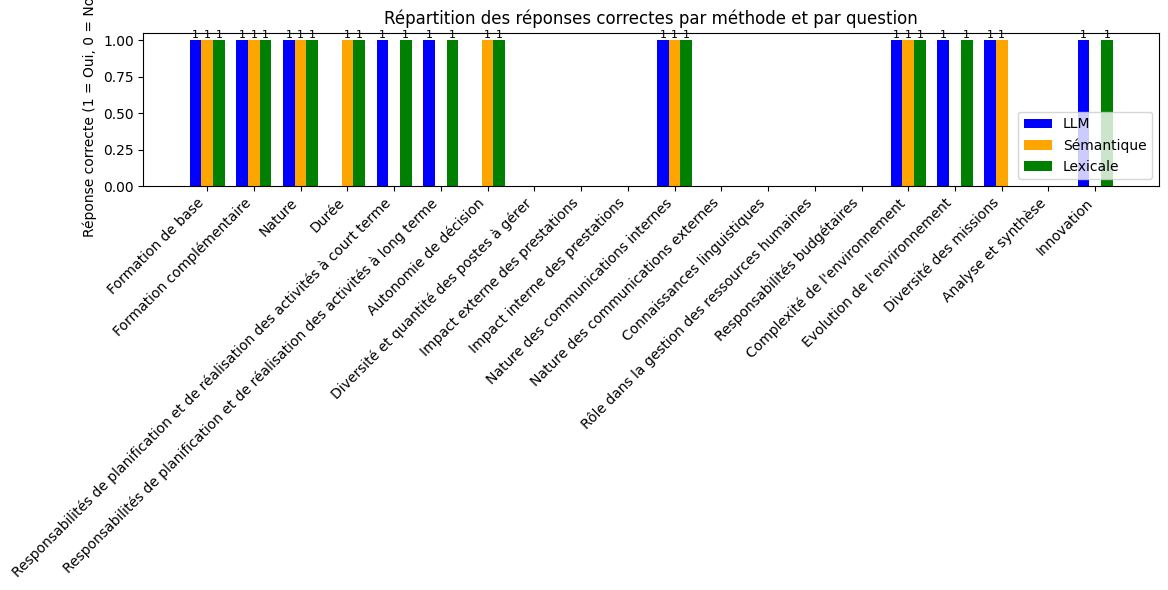

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Compare for Test6

In [31]:
all_matches = pd.read_json("results/all_matches_of_Test6.docx.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')
all_matches.to_json("results/all_matches_best_of_Test6.docx.json", orient="records", force_ascii=False, indent=4)

In [32]:
semantique= pd.read_json("results/all_matches_best_of_Test6.docx.json", orient="records")
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

,title,question_semantique,sentence_semantique
0,Nature,La fonction requiert de l'expérience professio...,Formation et expériences professionnelles requ...
1,Responsabilités budgétaires,La fonction participe de manière déterminante ...,Participer à la bonne gestion administrative e...
2,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,la formatrice veille de sa propre initiative à...
3,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,la formatrice veille de sa propre initiative à...
4,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Formation et expériences professionnelles requ...
5,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
6,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,en fonction des objectifs liés au projet
7,Formation complémentaire,"Deux formations complémentaires, ou plus, sont...",et propose les formations continues et autres ...
8,Analyse et synthèse,La fonction requiert la faculté d'analyser des...,recherches et analyse dans un environnement co...
9,Autonomie de décision,"La fonction approuve, pour une Fondation, les ...",du système de gestion et de la Fondation dans ...


In [33]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Test6.docx.json", orient="records")
lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

,title,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,Diplôme de travailleur-euse social-e de niveau...
1,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",(selon critères d'évaluation des fonctions des...
2,Innovation,L'exercice de la fonction requiert la capacité...,Adapte le contenu de la formation selon les ré...
3,Autonomie de décision,"La fonction approuve, pour une Fondation, les ...",Participe au choix et à l'élaboration d'un pro...
4,Impact interne des prestations,L'activité de la fonction a un impact détermin...,Adapte le contenu de la formation selon les ré...
5,Impact externe des prestations,La fonction a un rôle primordial dans le choix...,du système de gestion et de la Fondation dans ...
6,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Participe au choix et à l'élaboration d'un pro...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
8,Responsabilités de planification et de réalisa...,La fonction participe de manière prépondérante...,des infrastructures et du lieu de formation da...
9,Nature,La fonction requiert d'avoir déjà eu le même t...,enseignant en école professionnel (IFFP ou équ...


In [34]:
llm= pd.read_json("results/after_llm_of_Test6.docx.json", orient="records")
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

,title,question_llm,sentence_llm
0,Analyse et synthèse,La fonction requiert la faculté d'analyser des...,Conceptualise et met en place des projets indi...
1,Autonomie de décision,"La fonction approuve, pour une Fondation, les ...",en appliquant les principes de la CCT-ES et le...
2,Complexité de l'environnement,La fonction fait fréquemment face à un degré i...,Conceptualise et met en place des projets indi...
3,Connaissances linguistiques,La fonction requiert des connaissances approfo...,Élabore la formation théorique (cours professi...
4,Diversité des missions,L'ensemble des tâches principales qui incomben...,ses interventions se font en harmonie avec les...
5,Diversité et quantité des postes à gérer,La fonction gère directement un grand nombre d...,en fonction des objectifs liés au projet
6,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,enseignant en école professionnel (IFFP ou équ...
7,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,Élabore et dispense des activités pour la form...
8,Formation complémentaire,"Deux formations complémentaires, ou plus, sont...",toute autre tâche relevant de son champ de com...
9,Formation de base,La fonction requiert une formation professionn...,enseignant en école professionnel (IFFP ou équ...


In [35]:
corrected= pd.read_json("results/corrected_of_Test6.docx.json", orient="records")

corrected.rename(columns={'question': 'question_corrected', 'sentence': 'sentence_corrected'}, inplace=True)
corrected

,title,question_corrected,sentence_corrected
0,Formation de base,La fonction requiert une formation professionn...,Diplôme de travailleur-euse social-e de niveau...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Le cahier des charges ne cite aucune exigence ...
2,Nature,La fonction requiert de l'expérience professio...,…avec 3 à 5 années d’expérience dans l’accompa...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l’expérience professionnelle est d...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,"Proposer, rédiger, organiser et planifier des ..."
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Met en adéquation le plan de formation en fonc...
6,Autonomie de décision,La fonction applique des consignes et des dire...,Les suivis et ajustements se font « en appliqu...
7,Diversité et quantité des postes à gérer,,
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Participe au développement du réseau d’entrepr...
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,Participer à la bonne gestion administrative e...


In [36]:
# Merge all four DataFrames on 'title' sequentially
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


,title,question_corrected,sentence_corrected,question_llm,sentence_llm,question_semantique,sentence_semantique,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert une formation professionn...,Diplôme de travailleur-euse social-e de niveau...,La fonction requiert une formation professionn...,enseignant en école professionnel (IFFP ou équ...,La fonction requiert un Bachelor (Université o...,Diplôme de travailleur-euse social-e de niveau...,La fonction requiert un Bachelor (Université o...,Diplôme de travailleur-euse social-e de niveau...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Le cahier des charges ne cite aucune exigence ...,"Deux formations complémentaires, ou plus, sont...",toute autre tâche relevant de son champ de com...,"Deux formations complémentaires, ou plus, sont...",et propose les formations continues et autres ...,"Deux formations complémentaires, ou plus, sont...",et propose les formations continues et autres ...
2,Nature,La fonction requiert de l'expérience professio...,…avec 3 à 5 années d’expérience dans l’accompa...,La fonction requiert d'avoir eu le même type d...,et propose les formations continues et autres ...,La fonction requiert de l'expérience professio...,Formation et expériences professionnelles requ...,La fonction requiert d'avoir déjà eu le même t...,enseignant en école professionnel (IFFP ou équ...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l’expérience professionnelle est d...,Une durée minimum de 1 à 3 ans d'expérience pr...,enseignant en école professionnel (IFFP ou équ...,Une durée minimum de 1 à 3 ans d'expérience pr...,Formation et expériences professionnelles requ...,Une durée minimum de 4 à 7 ans d'expérience pr...,la formatrice veille de sa propre initiative à...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,"Proposer, rédiger, organiser et planifier des ...",La fonction participe de manière prépondérante...,Conceptualise et met en place des projets indi...,La fonction participe à l'élaboration et/ou à ...,en fonction des objectifs liés au projet,La fonction participe de manière prépondérante...,des infrastructures et du lieu de formation da...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Met en adéquation le plan de formation en fonc...,La fonction est responsable de l'élaboration e...,trice contribue par des propositions motivées ...,La fonction est responsable de l'élaboration e...,en fonction des objectifs liés au projet,La fonction contribue de manière active à l'él...,Participe au choix et à l'élaboration d'un pro...
6,Autonomie de décision,La fonction applique des consignes et des dire...,Les suivis et ajustements se font « en appliqu...,"La fonction approuve, pour une Fondation, les ...",en appliquant les principes de la CCT-ES et le...,"La fonction approuve, pour une Fondation, les ...",du système de gestion et de la Fondation dans ...,"La fonction approuve, pour une Fondation, les ...",Participe au choix et à l'élaboration d'un pro...
7,Diversité et quantité des postes à gérer,,,La fonction gère directement un grand nombre d...,en fonction des objectifs liés au projet,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées,La fonction n'a pas de postes directement subo...,Fonctions directement subordonnées
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Participe au développement du réseau d’entrepr...,La fonction a un rôle participatif dans la pre...,S'impliquer dans les principes pédagogiques,La fonction a un rôle participatif dans la pre...,dans le cadre des projets et actions de format...,La fonction a un rôle primordial dans le choix...,du système de gestion et de la Fondation dans ...
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,Participer à la bonne gestion administrative e...

In [37]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    




In [38]:
nbreReponsesCommunes = len(mappingRepCommunes)
nbreReponsesCommunes

0

In [39]:
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

Taux de réponses communes : 0.00%


In [40]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [41]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Nature
--> La fonction requiert de l'expérience professionnelle préalable.
Réponse commune pour la question : Impact externe des prestations
--> La fonction a un rôle participatif dans la prestation fournie aux bénéficiares de prestations, dans le cadre de procédures standardisées. La qualité des documents/informations/prestations qu'elle fournit peut influencer l'image de l'/des institution/s et avoir des conséquences sur les bénéfiaires de prestations.
Réponse commune pour la question : Impact interne des prestations
--> L'activité de la fonction a un impact modéré tant sur les coûts que sur le bon fonctionnement de l'/des institution/s.


In [42]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
nbreReponsesCorrectedSemantique

3

In [43]:
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

Taux de réponses correctes par la méthode sémantique : 23.08%


In [44]:
correctedAndLlm = corrected.merge(llm, on='title')

In [45]:
correctedAndLlm

,title,question_corrected,sentence_corrected,question_llm,sentence_llm
0,Formation de base,La fonction requiert une formation professionn...,Diplôme de travailleur-euse social-e de niveau...,La fonction requiert une formation professionn...,enseignant en école professionnel (IFFP ou équ...
1,Formation complémentaire,Aucune formation complémentaire n'est nécessai...,Le cahier des charges ne cite aucune exigence ...,"Deux formations complémentaires, ou plus, sont...",toute autre tâche relevant de son champ de com...
2,Nature,La fonction requiert de l'expérience professio...,…avec 3 à 5 années d’expérience dans l’accompa...,La fonction requiert d'avoir eu le même type d...,et propose les formations continues et autres ...
3,Durée,Une durée minimum de 0 à 1 an d'expérience pro...,La durée de l’expérience professionnelle est d...,Une durée minimum de 1 à 3 ans d'expérience pr...,enseignant en école professionnel (IFFP ou équ...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,"Proposer, rédiger, organiser et planifier des ...",La fonction participe de manière prépondérante...,Conceptualise et met en place des projets indi...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,Met en adéquation le plan de formation en fonc...,La fonction est responsable de l'élaboration e...,trice contribue par des propositions motivées ...
6,Autonomie de décision,La fonction applique des consignes et des dire...,Les suivis et ajustements se font « en appliqu...,"La fonction approuve, pour une Fondation, les ...",en appliquant les principes de la CCT-ES et le...
7,Diversité et quantité des postes à gérer,,,La fonction gère directement un grand nombre d...,en fonction des objectifs liés au projet
8,Impact externe des prestations,La fonction a un rôle participatif dans la pre...,Participe au développement du réseau d’entrepr...,La fonction a un rôle participatif dans la pre...,S'impliquer dans les principes pédagogiques
9,Impact interne des prestations,L'activité de la fonction a un impact modéré t...,Participer à la bonne gestion administrative e...,L'activité de la fonction a un impact modéré t...,Participer à la bonne gestion administrative e...


In [46]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert une formation professionnelle initiale de 2 ans (AFP) ou équivalent.
Réponse commune pour la question : Impact externe des prestations
--> La fonction a un rôle participatif dans la prestation fournie aux bénéficiares de prestations, dans le cadre de procédures standardisées. La qualité des documents/informations/prestations qu'elle fournit peut influencer l'image de l'/des institution/s et avoir des conséquences sur les bénéfiaires de prestations.
Réponse commune pour la question : Impact interne des prestations
--> L'activité de la fonction a un impact modéré tant sur les coûts que sur le bon fonctionnement de l'/des institution/s.
Réponse commune pour la question : Nature des communications internes
--> Les communications impliquent des échanges d'informations et des négociations sur des sujets complexes dans le cadre de prises de décisions. La fonction nécessite des capacités à négocier, comprendre et gér

In [47]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

Taux de réponses correctes par la méthode llm : 30.77%


In [48]:
correctedAndLexicale = corrected.merge(lexicale, on='title')
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Responsabilités de planification et de réalisation des activités à long terme
--> La fonction contribue de manière active à l'élaboration et/ou au suivi de plans à long terme et/ou a un rôle de conseil dans l'évaluation des besoins futurs.
Réponse commune pour la question : Nature des communications internes
--> Les communications impliquent des échanges d'informations et des négociations sur des sujets complexes dans le cadre de prises de décisions. La fonction nécessite des capacités à négocier, comprendre et gérer différentes perceptions des prestations offertes.


In [49]:
nbreReponsesCorrectedLexicale= len(mappingRepCorrectedLlm)
tauxReponseCorrectedlexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedlexicale:.2f}%")

Taux de réponses correctes par la méthode lexicale : 30.77%


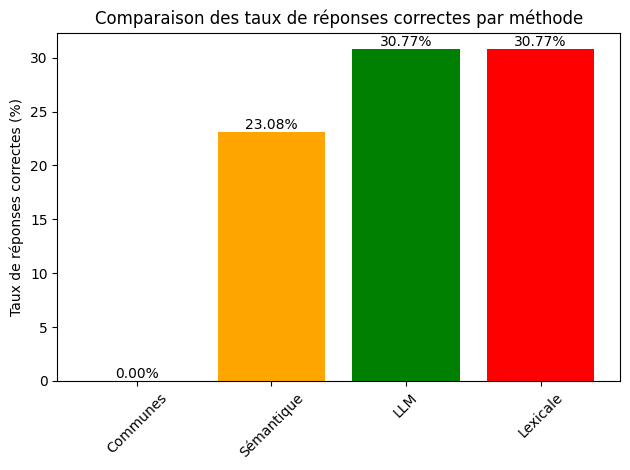

In [50]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedlexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

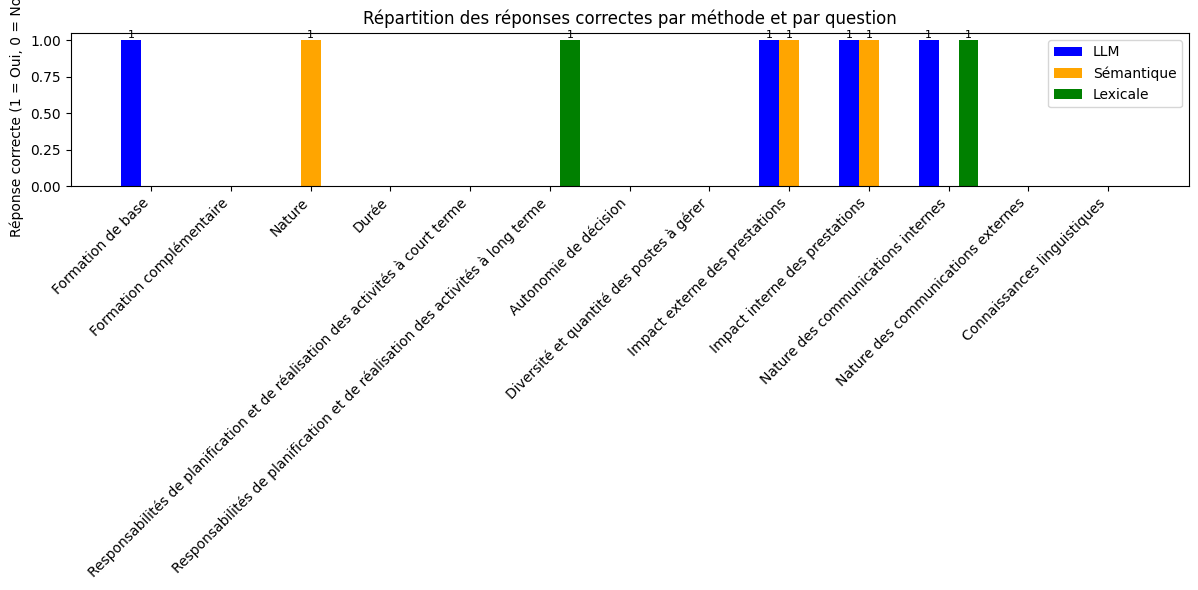

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [52]:
all_matches = pd.read_json("results/all_matches_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
all_matches = all_matches.sort_values(by='score', ascending=False)
all_matches = all_matches.drop_duplicates(subset=['title'], keep='first')


In [53]:
all_matches.to_json("results/all_matches_best_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records", force_ascii=False, indent=4)

In [54]:
semantique= pd.read_json("results/all_matches_best_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
semantique.drop(columns=[ 'score', 'pts'], inplace=True)

semantique.rename(columns={'question': 'question_semantique', 'sentence': 'sentence_semantique'}, inplace=True)
semantique

,title,question_semantique,sentence_semantique
0,Connaissances linguistiques,La fonction requiert des connaissances linguis...,Parfaite maîtrise de la langue française et ca...
1,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
2,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,Postes hiérarchiquement subordonnés
3,Nature,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
5,Responsabilités de planification et de réalisa...,La fonction préavise des plans à long terme. E...,l’évolution des métiers et des besoins et prop...
6,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",Sens des responsabilités et autonomie dans la ...
7,Formation complémentaire,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
8,Nature des communications externes,Les communications portent essentiellement sur...,Excellentes capacités de vulgarisation et de t...
9,Innovation,L'exercice de la fonction requiert des compéte...,l’évolution des métiers et des besoins et prop...


In [55]:
lexicale= pd.read_json("results/after_comparaison_lexicale_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")

lexicale.drop(columns=[ 'score', 'pts','similarity'], inplace=True)
lexicale.rename(columns={'question': 'question_lexicale', 'sentence': 'sentence_lexicale'}, inplace=True)

lexicale

,title,question_lexicale,sentence_lexicale
0,Responsabilités budgétaires,La fonction participe à l'élaboration et assur...,Coordonner le suivi administratif du domaine d...
1,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
2,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
3,Rôle dans la gestion des ressources humaines,"Elle a un rôle de direction, d'organisation et...",l’adjoint-e du-de la chef-fe de service et les...
4,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
5,Autonomie de décision,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
6,Impact externe des prestations,La fonction a un rôle primordial dans le choix...,participer à la définition et à la mise en œuv...
7,Innovation,L'exercice de la fonction requiert des compéte...,Sens aigu des priorités et de la gestion des r...
8,Nature,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
9,Responsabilités de planification et de réalisa...,La fonction est responsable de l'élaboration e...,monitoring et la priorisation de tous les proj...


In [56]:
llm= pd.read_json("results/after_llm_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
llm.drop(columns=[ 'score', 'pts'], inplace=True)
llm.rename(columns={'question': 'question_llm', 'sentence': 'sentence_llm'}, inplace=True)
llm

,title,question_llm,sentence_llm
0,Analyse et synthèse,La fonction requiert la faculté d'analyser des...,Pensée analytique et conceptuelle
1,Autonomie de décision,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
2,Complexité de l'environnement,La fonction fait fréquemment face à un degré i...,l’évolution des métiers et des besoins et prop...
3,Connaissances linguistiques,La fonction requiert des connaissances linguis...,Parfaite maîtrise de la langue française et ca...
4,Diversité des missions,L'ensemble des tâches principales qui incomben...,Assurer la fonction de « project office » pour...
5,Diversité et quantité des postes à gérer,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »
6,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...
7,Evolution de l'environnement,La fonction s'exerce dans un environnement à é...,Compétences avérées en gestion du changement (...
8,Formation complémentaire,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...
9,Formation de base,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...


In [57]:
corrected = pd.read_excel("EvalStarling/RadGridExport.xlsx")

corrected.drop(index=0, inplace=True)
corrected

,Nombre de cas: 25/25,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,1PJ81032,200,A,1,1,5,5,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Formation de base,La fonction requiert un Bachelor (Université o...,1,8
2,1PJ81032,200,A,1,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Formation complémentaire,Une formation complémentaire est nécessaire po...,1,3
3,1PJ81032,200,A,2,1,3,3,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Nature,La fonction requiert d'avoir déjà eu le même t...,1,4
4,1PJ81032,200,A,2,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,1,4
5,1PJ81032,200,B,1,1,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,1,5
6,1PJ81032,200,B,1,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,1,5
7,1PJ81032,200,B,2,1,3,3,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Autonomie de décision,La fonction agit de manière autonome dans le c...,1,5
8,1PJ81032,200,B,3,1,1,1,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,1,5
9,1PJ81032,200,B,3,2,2,2,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,1,4
10,1PJ81032,200,B,4,1,1,1,0,2025-07-08 15:41:19,admin2.admin2@spark-hr.ch,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,1,6


In [58]:
corrected = pd.read_excel("EvalStarling/RadGridExport.xlsx")

corrected.drop(index=0, inplace=True)
corrected.rename(columns={'Unnamed: 10': 'title', 'Unnamed: 11': 'question_corrected'}, inplace=True)
corrected=corrected[["title", "question_corrected"]]


In [59]:
with open("results/corrected_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", "w", encoding="utf-8") as f:
    corrected.to_json(f, orient="records", force_ascii=False, indent=4)

In [60]:
corrected= pd.read_json("results/corrected_of_Cahier des charges_nouveau poste 2025_V0.6_définitive.pdf.json", orient="records")
corrected

,title,question_corrected
0,Formation de base,La fonction requiert un Bachelor (Université o...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...
2,Nature,La fonction requiert d'avoir déjà eu le même t...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...


In [61]:
tableGenerale = corrected.merge(llm, on='title') \
						 .merge(semantique, on='title') \
						 .merge(lexicale, on='title')
tableGenerale


,title,question_corrected,question_llm,sentence_llm,question_semantique,sentence_semantique,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,responsable de la formation des apprenant-e-s,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,Sens aigu des priorités et de la gestion des r...,La fonction est responsable de l'élaboration e...,monitoring et la priorisation de tous les proj...,La fonction est responsable de l'élaboration e...,monitoring et la priorisation de tous les proj...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...,La fonction préavise des plans à long terme. E...,l’évolution des métiers et des besoins et prop...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...,La fonction agit de manière autonome dans le c...,l’évolution des métiers et des besoins et prop...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »,La fonction n'a pas de postes directement subo...,Postes hiérarchiquement subordonnés,La fonction gère directement un grand nombre d...,l’adjoint-e du-de la chef-fe de service et les...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",Chargé-e de projets RH et responsable de la fo...,"Elle a un rôle de direction, d'organisation et...",Sens des responsabilités et autonomie dans la ...,"Elle a un rôle de direction, d'organisation et...",l’adjoint-e du-de la chef-fe de service et les...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...,La fonction participe à l'élaboration et assur...,Coordonner le suivi administratif du domaine d...


In [62]:
mappingRepCommunes={}
for row in tableGenerale.itertuples():
	if (
		row.question_corrected == row.question_llm
		and row.question_corrected == row.question_semantique
		and row.question_corrected == row.question_lexicale
	):
		mappingRepCommunes[row.title] = row.question_corrected
		ReponsesCommunes = getattr(row, 'title')
		print(f"Réponse commune pour la question : {ReponsesCommunes}")
		print(f"--> {row.question_corrected}")
    


Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.


In [63]:
nbreReponsesCommunes = len(mappingRepCommunes)
tauxReponseCorrect=nbreReponsesCommunes/    len(tableGenerale) * 100

print(f"Taux de réponses communes : {tauxReponseCorrect:.2f}%")

Taux de réponses communes : 15.00%


### Réponses correctes par la méthode sémantique

In [64]:
correctedAndSemantique = corrected.merge(semantique, on='title')

In [65]:
mappingRepCorrectedSemantique = {}
for row in correctedAndSemantique.itertuples():
    if row.question_corrected == row.question_semantique:
        mappingRepCorrectedSemantique[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Autonomie de décision
--> La fonction agit de manière autonome dans le cadre de directives établies. Elle peut prendre des initiatives pour l'amélioration des prestations, dans le cadre de limites définies (budget, crédits, délais, etc.), qu'elle peut faire adapter si la situation l'exige.
Réponse commune pour la question : Diversité et quantité des postes à gérer
--> La fonction n'a pas de postes directement subordonnés.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.
Réponse commune pour la question : Evolution de l'environnement
--> La fonction s'

In [66]:
nbreReponsesCorrectedSemantique = len(mappingRepCorrectedSemantique)
tauxReponseCorrectedSemantique = nbreReponsesCorrectedSemantique / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode sémantique : {tauxReponseCorrectedSemantique:.2f}%")

Taux de réponses correctes par la méthode sémantique : 30.00%


### Réponses correctes par la méthode llm

In [67]:
correctedAndLlm = corrected.merge(llm, on='title')
correctedAndLlm

,title,question_corrected,question_llm,sentence_llm
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,Une formation complémentaire est nécessaire po...,En qualité de « Responsable de la formation co...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,responsable de la formation des apprenant-e-s
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,En qualité de « Responsable de la formation co...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,Sens aigu des priorités et de la gestion des r...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,piloter et accompagner la mise en œuvre de pro...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,En qualité de « Chargé-e de projets RH »
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",Chargé-e de projets RH et responsable de la fo...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,Suivre l’évolution du budget de formation en c...


In [68]:
mappingRepCorrectedLlm = {}
for row in correctedAndLlm.itertuples():
    if row.question_corrected == row.question_llm:
        mappingRepCorrectedLlm[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Formation complémentaire
--> Une formation complémentaire est nécessaire pour l'exercice de la fonction.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.


In [69]:
nbreReponsesCorrectedLlm = len(mappingRepCorrectedLlm)
nbreReponsesCorrectedLlm

4

In [70]:
tauxReponseCorrectedllm = nbreReponsesCorrectedLlm / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode llm : {tauxReponseCorrectedllm:.2f}%")

Taux de réponses correctes par la méthode llm : 20.00%


In [71]:
correctedAndLexicale = corrected.merge(lexicale, on='title')
correctedAndLexicale

,title,question_corrected,question_lexicale,sentence_lexicale
0,Formation de base,La fonction requiert un Bachelor (Université o...,La fonction requiert un Bachelor (Université o...,Formation supérieure de niveau Bachelor ou Mas...
1,Formation complémentaire,Une formation complémentaire est nécessaire po...,"Deux formations complémentaires, ou plus, sont...",Minimum 3 à 5 ans de pratique professionnelle ...
2,Nature,La fonction requiert d'avoir déjà eu le même t...,La fonction requiert de l'expérience professio...,Minimum 3 à 5 ans de pratique professionnelle ...
3,Durée,Une durée minimum de 1 à 3 ans d'expérience pr...,Une durée minimum de 1 à 3 ans d'expérience pr...,Minimum 3 à 5 ans de pratique professionnelle ...
4,Responsabilités de planification et de réalisa...,La fonction participe à l'élaboration et/ou à ...,La fonction est responsable de l'élaboration e...,monitoring et la priorisation de tous les proj...
5,Responsabilités de planification et de réalisa...,La fonction contribue de manière active à l'él...,La fonction est responsable de l'élaboration e...,participer à la définition et à la mise en œuv...
6,Autonomie de décision,La fonction agit de manière autonome dans le c...,"La fonction approuve, pour l'/les institution/...",participer à la définition et à la mise en œuv...
7,Diversité et quantité des postes à gérer,La fonction n'a pas de postes directement subo...,La fonction gère directement un grand nombre d...,l’adjoint-e du-de la chef-fe de service et les...
8,Rôle dans la gestion des ressources humaines,Elle a un rôle d'animation incluant le transfe...,"Elle a un rôle de direction, d'organisation et...",l’adjoint-e du-de la chef-fe de service et les...
9,Responsabilités budgétaires,La fonction n'est pas impliquée dans l'élabora...,La fonction participe à l'élaboration et assur...,Coordonner le suivi administratif du domaine d...


In [72]:
mappingRepCorrectesLexicale = {}
for row in correctedAndLexicale.itertuples():
    if row.question_corrected == row.question_lexicale:
        mappingRepCorrectesLexicale[row.title] = row.question_corrected
        ReponsesCommunes = getattr(row, 'title')
        print(f"Réponse commune pour la question : {ReponsesCommunes}")
        print(f"--> {row.question_corrected}")

Réponse commune pour la question : Formation de base
--> La fonction requiert un Bachelor (Université ou HES) ou équivalent.
Réponse commune pour la question : Durée
--> Une durée minimum de 1 à 3 ans d'expérience professionnelle est nécessaire à l'exercice de la fonction.
Réponse commune pour la question : Connaissances linguistiques
--> La fonction requiert des connaissances linguistiques approfondies (lecture, conversation et rédaction) en français.


In [73]:
nbreReponsesCorrectedLexicale = len(mappingRepCorrectesLexicale)
nbreReponsesCorrectedLexicale

3

In [74]:
tauxReponseCorrectedLexicale = nbreReponsesCorrectedLexicale / len(correctedAndSemantique) * 100
print(f"Taux de réponses correctes par la méthode lexicale : {tauxReponseCorrectedLexicale:.2f}%")

Taux de réponses correctes par la méthode lexicale : 15.00%


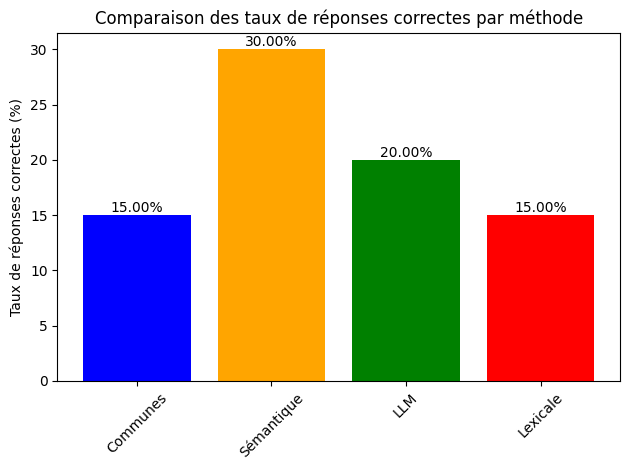

In [75]:
import matplotlib.pyplot as plt
import numpy as np
# Data for the bar chart
labels = ['Communes', 'Sémantique', 'LLM', 'Lexicale']
values = [tauxReponseCorrect, tauxReponseCorrectedSemantique, tauxReponseCorrectedllm, tauxReponseCorrectedLexicale]    
# Create a bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
# Add labels and title
ax.set_ylabel('Taux de réponses correctes (%)')
ax.set_title('Comparaison des taux de réponses correctes par méthode')
# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

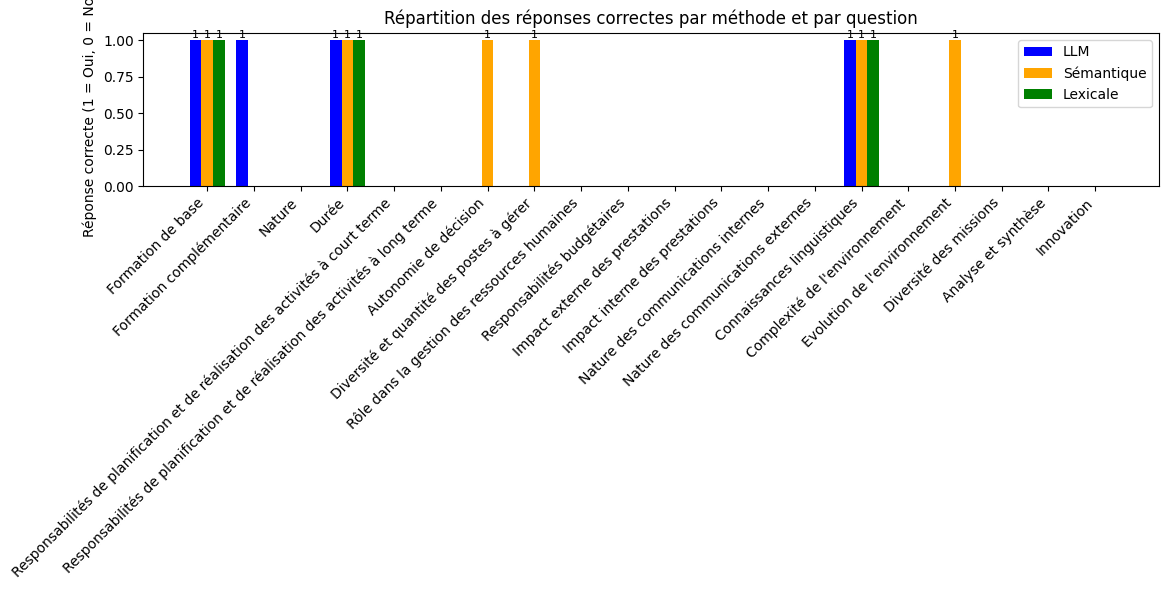

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Liste des questions
questions = tableGenerale['title'].tolist()

# Données par type de correction
llm_values = [1 if q in mappingRepCorrectedLlm else 0 for q in questions]
semantic_values = [1 if q in mappingRepCorrectedSemantique else 0 for q in questions]
lexical_values = [1 if q in mappingRepCorrectesLexicale else 0 for q in questions]

x = np.arange(len(questions))  # positions des groupes
width = 0.25  # largeur de chaque barre

fig, ax = plt.subplots(figsize=(12, 6))

# Affichage des barres groupées
bars1 = ax.bar(x - width, llm_values, width, label='LLM', color='blue')
bars2 = ax.bar(x, semantic_values, width, label='Sémantique', color='orange')
bars3 = ax.bar(x + width, lexical_values, width, label='Lexicale', color='green')

# Personnalisation
ax.set_ylabel('Réponse correcte (1 = Oui, 0 = Non)')
ax.set_title('Répartition des réponses correctes par méthode et par question')
ax.set_xticks(x)
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.legend()

# Affichage des valeurs au-dessus des barres
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
